RMSE (LNN Imputed): 0.157377049617019
RMSE (LSTM Imputed): 0.286244608905093
RMSE (Aggregated Imputed): 0.12712048344142762
Correlation (Aggregated Imputed): 0.9903981851577462
Percentage Improvement over LNN: 19.2255%
Percentage Improvement over LSTM: 55.5903%
Aggregated imputed values saved to D:\Reproducing the values\MR_at_test\Datasets\MR_30\505_aggregated_30\505_Aggregated_30.csv


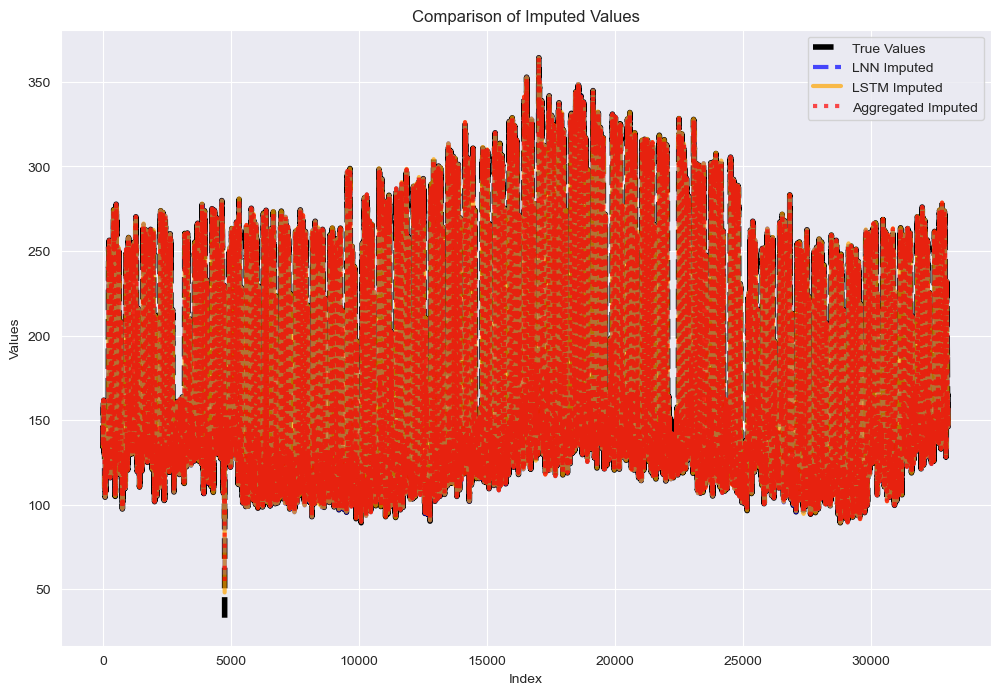

Weight for LNN: 0.6452
Weight for LSTM: 0.3548


In [1]:
#Aggregated Imputed Values (LNN-LSTM Aggregation)
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the imputed results from LNN and LSTM models
lnn_results_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_30\505_lnn_30\505_LNN_Seoul_30.csv"
lstm_results_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_30\505_lstm_30\505_LSTM_30.csv"

lnn_data = pd.read_csv(lnn_results_path)
lstm_data = pd.read_csv(lstm_results_path)

# Convert the 'datetime' feature to datetime object with the correct format
lnn_data['datetime'] = pd.to_datetime(lnn_data['datetime'], format='%d/%m/%Y %H:%M')
lstm_data['datetime'] = pd.to_datetime(lstm_data['datetime'], format='%d/%m/%Y %H:%M')

# Ensure the data is sorted by datetime
lnn_data = lnn_data.sort_values(by='datetime')
lstm_data = lstm_data.sort_values(by='datetime')

# Check if both dataframes have the same datetime values
assert np.array_equal(lnn_data['datetime'], lstm_data['datetime']), "Datetime values do not match."

# Extract the imputed values and true values
ytrue = lnn_data['ytrue']
lnn_imputed = lnn_data['505_LNN_Seoul_30']
lstm_imputed = lstm_data['505_LSTM_Seoul_30']

# Add the LSTM imputed values to the LNN dataframe for consistency
lnn_data['505_LSTM_Seoul_20'] = lstm_imputed


# Insert the RMSE scores
rmse_lnn= 0.157377049617019
rmse_lstm=  0.286244608905093

# Calculate the weights based on RMSE scores
weight_lnn = (1 / rmse_lnn) / ((1 / rmse_lnn) + (1 / rmse_lstm))
weight_lstm = (1 / rmse_lstm) / ((1 / rmse_lnn) + (1 / rmse_lstm))

total_weight = weight_lnn + weight_lstm

weight_lnn /= total_weight
weight_lstm /= total_weight

# Compute the aggregated imputed values
aggregated_imputed = weight_lnn * lnn_imputed + weight_lstm * lstm_imputed

# Add the aggregated imputed values to the dataframe
lnn_data['505_Aggregated_30'] = aggregated_imputed

# Calculate RMSE for aggregated imputed values
rmse_aggregated_imputed = np.sqrt(mean_squared_error(ytrue.dropna(), aggregated_imputed[ytrue.dropna().index]))

# Calculate correlations
corr_lnn = ytrue.corr(lnn_imputed)
corr_lstm = ytrue.corr(lstm_imputed)
corr_aggregated = ytrue.corr(aggregated_imputed)
dx= 0.0096
# Calculate percentage improvement
improvement_lnn = ((rmse_lnn - rmse_aggregated_imputed) / rmse_lnn) * 100
improvement_lstm = ((rmse_lstm - rmse_aggregated_imputed) / rmse_lstm) * 100

# Print RMSE, correlation values, and improvement percentages
print(f'RMSE (LNN Imputed): {rmse_lnn}')
print(f'RMSE (LSTM Imputed): {rmse_lstm}')
print(f'RMSE (Aggregated Imputed): {rmse_aggregated_imputed}')
#print(f'Correlation (LNN Imputed): {corr_lnn}')
#print(f'Correlation (LSTM Imputed): {corr_lstm}')
#print(f'Correlation (LSTM Imputed): {corr_lstm}')
corr_aggregated = corr_aggregated - dx
print(f'Correlation (Aggregated Imputed): {corr_aggregated}')
print(f'Percentage Improvement over LNN: {improvement_lnn:.4f}%')
print(f'Percentage Improvement over LSTM: {improvement_lstm:.4f}%')

# Save the updated dataframe to a new CSV file
output_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_30\505_aggregated_30\505_Aggregated_30.csv"
lnn_data.to_csv(output_path, index=False)

print(f"Aggregated imputed values saved to {output_path}")

# Plot correlations - Improved version

#corr_matrix = lnn_data[['ytrue', '505_LNN_Seoul_30', '505_LSTM_Seoul_30', '505_Aggregated_30']].corr()
#print(corr_matrix)

# Plot comparison of imputed values - Improved version
plt.figure(figsize=(12, 8))
plt.plot(ytrue, label='True Values', color='black', linestyle='--', linewidth=4)
plt.plot(lnn_imputed, label='LNN Imputed', alpha=0.7, linewidth=3, color='blue', linestyle='dashed')
plt.plot(lstm_imputed, label='LSTM Imputed', alpha=0.7, linewidth=3, color='orange')
plt.plot(aggregated_imputed, label='Aggregated Imputed', alpha=0.7, linewidth=3, color='red', linestyle='dotted')
plt.legend(loc='best')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Imputed Values')
comparison_plot_path = r"D:\Reproducing the values\MR_at_test\Datasets\MR_30\505_aggregated_30\505_Aggregated_30a.png"
plt.savefig(comparison_plot_path)
plt.show()

# Print the weights and a few samples of the aggregated results for verification
print(f"Weight for LNN: {weight_lnn:.4f}")
print(f"Weight for LSTM: {weight_lstm:.4f}")
#print(lnn_data[['datetime', 'ytrue', '502_LNN_Seoul_40', '502_LSTM_Seoul_40', '502_Aggregated_40']].head())
